In [66]:
from utils import data_loader
import numpy as np
import importlib
importlib.reload(data_loader)

# import data (AWA2 dataset)
trainDataX, trainDataLabels, trainDataAttrs, testDataX, testDataLabels, testDataAttrs = data_loader.DataLoader("./data/AWA2").load()

In [68]:
import matplotlib.pyplot as plt


 
from scipy import io
res101 = io.loadmat('./data/AWA2/res101.mat')
att_splits=io.loadmat('./data/AWA2/att_splits.mat')

## AWA 2
It consists of 37322 images of 50 animals classes with pre-extracted feature representations for each image.

### Shapes

In [69]:
print("TRAIN:::")
print(trainDataX.shape)
print(trainDataLabels.shape)
print(trainDataAttrs.shape)

print("TEST:::")
print(testDataX.shape)
print(testDataLabels.shape)
print(testDataAttrs.shape)

TRAIN:::
(29409, 2048)
(29409,)
(29409, 85)
TEST:::
(7913, 2048)
(7913,)
(7913, 85)


### X - image embeddings (transformations of images in the vector space)

An image embedding is a lower-dimensional representation of the image. They are representations of images focussing on important details. No image preprocessing.

"Our image embeddings are 2048-dim top-layer pooling units of the 101-layered ResNet" [1]
"We use the original ResNet-101 that is pre-trained on ImageNet with 1K classes, i.e. the balanced subset, and we do not fine-tune it for any of the mentioned datasets" [1]

In [70]:
trainDataX[0]

array([0.12702841, 3.2361083 , 0.93514752, ..., 0.67223716, 0.03226495,
       0.4076162 ])

### Classes names

In [71]:
classes_names = [a[0] for a in np.squeeze(att_splits['allclasses_names'])]
id_to_name = {i:name for (i,name) in enumerate(classes_names)}
classes_ids = id_to_name.keys()

print(classes_names)

['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian', 'persian+cat', 'horse', 'german+shepherd', 'blue+whale', 'siamese+cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard', 'moose', 'spider+monkey', 'humpback+whale', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant+panda', 'deer', 'bobcat', 'pig', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus', 'raccoon', 'cow', 'dolphin']


### Class embeddings


"per-class attributes between values
0 and 1 that are provided with the datasets as binary attributes have been shown to be weaker than continuous attributes"[1]

In [72]:
trainDataAttrs[0]

array([-0.00375358, -0.00375358, -0.00375358, -0.00375358,  0.0463192 ,
        0.        ,  0.        ,  0.        ,  0.0604702 ,  0.03449542,
        0.        ,  0.14297393,  0.0166659 ,  0.10716476,  0.14545129,
        0.02132034,  0.06407364,  0.15010573,  0.        ,  0.        ,
        0.25179026,  0.02920287,  0.        ,  0.22611576,  0.06306017,
        0.15235788,  0.11148138,  0.02086991,  0.00927135,  0.        ,
        0.32817565,  0.        ,  0.03243095,  0.03393238,  0.        ,
        0.03464556,  0.00461691,  0.        ,  0.20487049,  0.2659788 ,
        0.01249943,  0.1259702 ,  0.03059169,  0.09811863,  0.        ,
        0.25468052,  0.15461003,  0.02762636,  0.00416648,  0.02604986,
        0.23392321,  0.        ,  0.0166659 ,  0.        ,  0.21680688,
        0.04740774,  0.12476905,  0.23219656,  0.        ,  0.        ,
        0.        ,  0.        ,  0.08528138,  0.20948739,  0.02214613,
        0.        ,  0.        ,  0.0746212 ,  0.20565874,  0.01

### Training class distribution

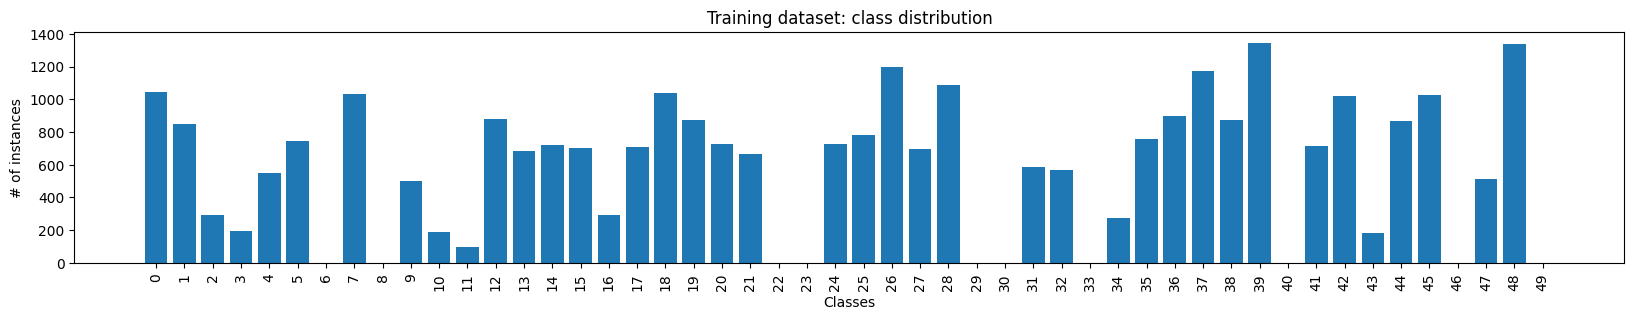

In [46]:
classes = np.unique(np.concatenate((trainDataLabels, testDataLabels)))
counts = [np.sum(trainDataLabels == cl) for cl in classes]
plt.figure(figsize=(20, 3))
plt.bar(classes,counts)
plt.xticks(classes, rotation='vertical')
plt.xlabel('Classes')
plt.ylabel("# of instances")
plt.title('Training dataset: class distribution')
plt.show()

### Testing class distribution

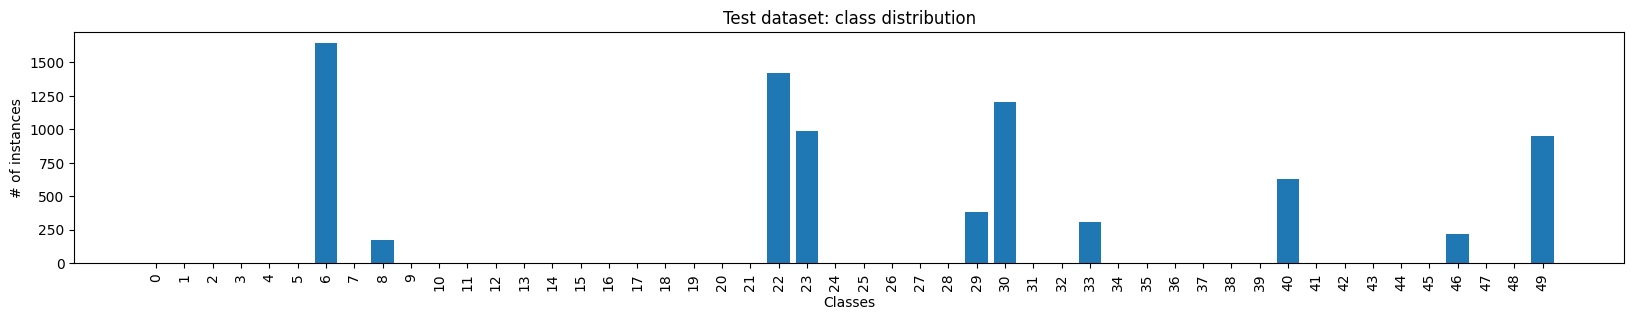

In [62]:
classes = np.unique(np.concatenate((trainDataLabels, testDataLabels)))
counts = [np.sum(testDataLabels == cl) for cl in classes]
plt.figure(figsize=(20, 3))
plt.bar(classes,counts)
plt.xticks(classes, rotation='vertical')
plt.xlabel('Classes')
plt.ylabel("# of instances")
plt.title('Test dataset: class distribution')
plt.show()

### References

[1] Zero-Shot Learning - A Comprehensive
Evaluation of the Good, the Bad and the Ugly
Yongqin Xian, Student Member, IEEE, Christoph H. Lampert,
Bernt Schiele, Fellow, IEEE, and Zeynep Akata, Member, IEEE